2025-08-01 23:41:18.154912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-01 23:41:18.155043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-01 23:41:18.299190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


FIXED EFFICIENTNET FOR TOMATO LEAF DISEASE DETECTION

Creating data generators with proper preprocessing...
Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.

Number of classes: 10
Classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

Diagnosing potential issues...
Number of training samples: 10000
Number of validation samples: 1000
Number of classes: 10
Batch size: 16

Batch shape: (16, 224, 224, 3)
Batch labels shape: (16, 10)
Sample min value: 0.0
Sample max value: 254.96713256835938


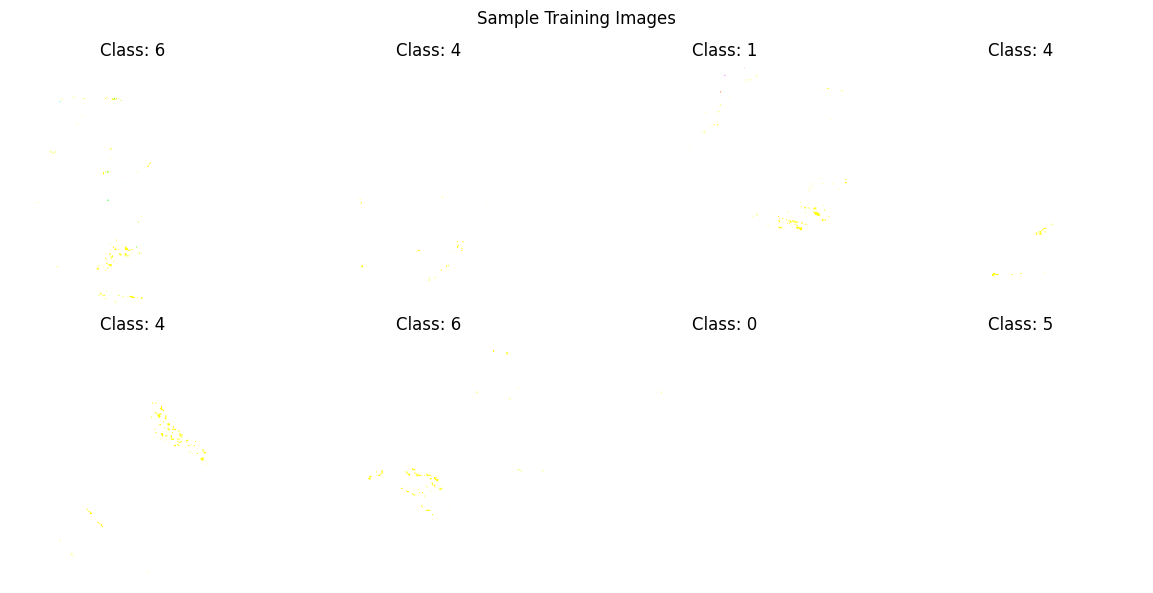


Creating model...
16705208/16705208 [==============================] - 2s 0us/step

Model created successfully!
Total parameters: 4,417,837

STAGE 1: Training classifier head only
Epoch 1/10


2025-08-01 23:41:47.011417: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1754091711.034726      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 163s 244ms/step - loss: 0.8503 - accuracy: 0.7196 - val_loss: 0.4558 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 115s 185ms/step - loss: 0.5281 - accuracy: 0.8190 - val_loss: 0.4062 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 116s 186ms/step - loss: 0.4405 - accuracy: 0.8514 - val_loss: 0.3379 - val_accuracy: 0.8880 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 119s 190ms/step - loss: 0.3796 - accuracy: 0.8714 - val_loss: 0.4235 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 113s 180ms/step - loss: 0.3555 - accuracy: 0.8772 - val_loss: 0.2651 - val_accuracy: 0.9110 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 115s 184ms/step - loss: 0.3239 - accuracy: 0.8899 - val_loss: 0.2598 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 7/10
625/625 [==============================] - 113

2025-08-02 00:01:47.256464: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - ETA: 0s - loss: 0.3634 - accuracy: 0.8804
Epoch 11: val_accuracy improved from -inf to 0.91300, saving model to best_model_fixed.h5
625/625 [==============================] - 126s 187ms/step - loss: 0.3634 - accuracy: 0.8804 - val_loss: 0.2690 - val_accuracy: 0.9130 - lr: 1.0000e-04
Epoch 12/100
625/625 [==============================] - ETA: 0s - loss: 0.2519 - accuracy: 0.9155
Epoch 12: val_accuracy improved from 0.91300 to 0.93800, saving model to best_model_fixed.h5
625/625 [==============================] - 117s 187ms/step - loss: 0.2519 - accuracy: 0.9155 - val_loss: 0.1926 - val_accuracy: 0.9380 - lr: 1.0000e-04
Epoch 13/100
625/625 [==============================] - ETA: 0s - loss: 0.1967 - accuracy: 0.9345
Epoch 13: val_accuracy improved from 0.93800 to 0.94100, saving model to best_model_fixed.h5
625/625 [==============================] - 121s 193ms/step - loss: 0.1967 - accuracy: 0.9345 - val_loss: 0.1782 - val_accuracy: 0.9410 - lr

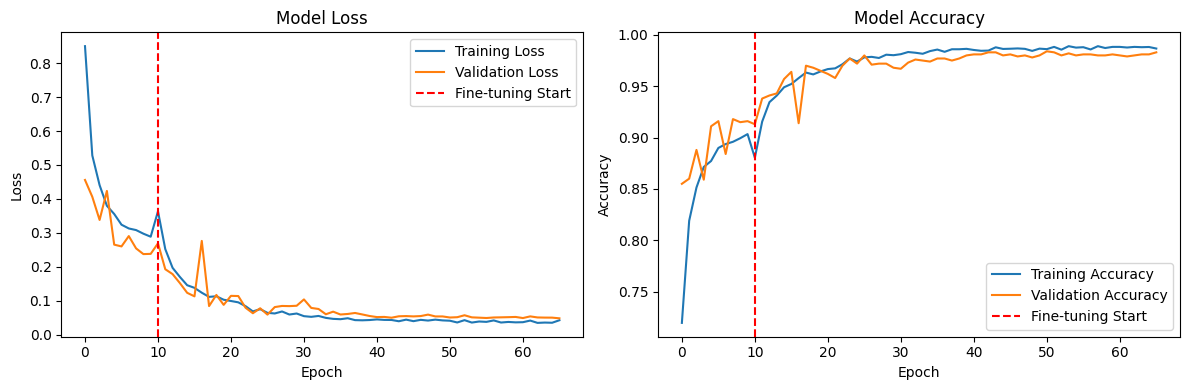


Training completed!
Final validation accuracy: 0.9830

RECOMMENDATIONS IF STILL HAVING ISSUES:

1. Try EVEN SIMPLER model:
   - Use EfficientNetB0 with just one Dense layer
   - Or try MobileNetV2 which is lighter

2. Check your data:
   - Ensure images are not corrupted
   - Verify class balance
   - Try training on a subset first (e.g., 5 classes)

3. Adjust hyperparameters:
   - Try batch_size = 32 or 64
   - Use warmup learning rate
   - Try different optimizers (SGD with momentum)

4. Data-specific issues:
   - Some tomato disease classes might be very similar
   - Consider grouping similar diseases
   - Add more aggressive augmentation

5. Alternative approach:
   - Try training from scratch with a smaller CNN
   - Use a different pretrained model (ResNet50, DenseNet121)



In [1]:
# Fixed implementation with better initialization and training strategy

import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seeds
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Configuration - UPDATED FOR BETTER TRAINING
CONFIG = {
    'IMAGE_SIZE': (224, 224),  # Reduced from 256 to match EfficientNet's expected size
    'BATCH_SIZE': 16,         # Reduced batch size for better gradient updates
    'EPOCHS': 100,
    'INITIAL_EPOCHS': 10,     # For first stage training
    'LEARNING_RATE': 0.001,   # Higher initial learning rate
    'DROPOUT_RATE': 0.2,      # Reduced dropout initially
    'PATIENCE': 15
}

print("="*70)
print("FIXED EFFICIENTNET FOR TOMATO LEAF DISEASE DETECTION")
print("="*70)

# Data paths
train_dir = '/kaggle/input/tomatoleaf/tomato/train'
val_dir = '/kaggle/input/tomatoleaf/tomato/val'

# STRATEGY 1: Two-Stage Training Approach
def create_model_two_stage(num_classes):
    """Create model with two-stage training approach"""
    
    # Use smaller EfficientNetB0 or B3 for faster training and better convergence
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling='avg'  # Use built-in global average pooling
    )
    
    # Stage 1: Freeze entire base model
    base_model.trainable = False
    
    # Build model
    inputs = base_model.input
    x = base_model.output
    
    # Simpler architecture initially
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model, base_model

# STRATEGY 2: Better Data Preprocessing
def create_improved_data_generators():
    """Create data generators with proper preprocessing"""
    
    # Use EfficientNet's preprocessing
    from tensorflow.keras.applications.efficientnet import preprocess_input
    
    # Training with moderate augmentation
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,  # Critical: Use EfficientNet preprocessing
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Validation with only preprocessing
    val_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input
    )
    
    # Create generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=CONFIG['IMAGE_SIZE'],
        batch_size=CONFIG['BATCH_SIZE'],
        class_mode='categorical',
        shuffle=True,
        seed=RANDOM_SEED
    )
    
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=CONFIG['IMAGE_SIZE'],
        batch_size=CONFIG['BATCH_SIZE'],
        class_mode='categorical',
        shuffle=False,
        seed=RANDOM_SEED
    )
    
    return train_generator, val_generator

# STRATEGY 3: Two-Stage Training Implementation
def train_two_stage(model, base_model, train_generator, val_generator):
    """Implement two-stage training"""
    
    print("\n" + "="*50)
    print("STAGE 1: Training classifier head only")
    print("="*50)
    
    # Stage 1: Train only top layers
    model.compile(
        optimizer=Adam(learning_rate=0.001),  # Higher learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train for initial epochs
    history_stage1 = model.fit(
        train_generator,
        epochs=CONFIG['INITIAL_EPOCHS'],
        validation_data=val_generator,
        callbacks=[
            ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max', verbose=1)
        ],
        verbose=1
    )
    
    print("\n" + "="*50)
    print("STAGE 2: Fine-tuning entire model")
    print("="*50)
    
    # Stage 2: Unfreeze and fine-tune
    base_model.trainable = True
    
    # Fine-tune from this layer onwards
    fine_tune_at = len(base_model.layers) - 20
    
    # Freeze early layers
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    
    # Recompile with lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Continue training
    history_stage2 = model.fit(
        train_generator,
        epochs=CONFIG['EPOCHS'],
        initial_epoch=CONFIG['INITIAL_EPOCHS'],
        validation_data=val_generator,
        callbacks=[
            EarlyStopping(monitor='val_accuracy', patience=CONFIG['PATIENCE'], mode='max', 
                         restore_best_weights=True, verbose=1),
            ModelCheckpoint('best_model_fixed.h5', monitor='val_accuracy', 
                           save_best_only=True, mode='max', verbose=1),
            ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, 
                             mode='max', min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )
    
    return history_stage1, history_stage2

# ALTERNATIVE STRATEGY: Simpler Model Architecture
def create_simple_efficientnet(num_classes):
    """Create a simpler model that's easier to train"""
    
    # Use transfer learning more effectively
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )
    
    # Create Sequential model for simplicity
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    # Freeze base model initially
    base_model.trainable = False
    
    return model, base_model

# DEBUGGING FUNCTION
def diagnose_training_issues(train_generator, val_generator):
    """Diagnose potential issues with data"""
    
    print("\nDiagnosing potential issues...")
    
    # Check class distribution
    print(f"Number of training samples: {train_generator.n}")
    print(f"Number of validation samples: {val_generator.n}")
    print(f"Number of classes: {train_generator.num_classes}")
    print(f"Batch size: {CONFIG['BATCH_SIZE']}")
    
    # Check if data is loaded correctly
    batch_x, batch_y = next(train_generator)
    print(f"\nBatch shape: {batch_x.shape}")
    print(f"Batch labels shape: {batch_y.shape}")
    print(f"Sample min value: {batch_x.min()}")
    print(f"Sample max value: {batch_x.max()}")
    
    # Visualize a batch
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(min(8, batch_x.shape[0])):
        # Denormalize for visualization if needed
        img = batch_x[i]
        if img.min() < 0:  # If preprocessed with ImageNet stats
            # Reverse ImageNet normalization approximately
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        
        axes[i].imshow(img)
        axes[i].set_title(f'Class: {np.argmax(batch_y[i])}')
        axes[i].axis('off')
    
    plt.suptitle('Sample Training Images')
    plt.tight_layout()
    plt.show()

# MAIN EXECUTION
print("\nCreating data generators with proper preprocessing...")
train_generator, val_generator = create_improved_data_generators()

# Get number of classes
num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())
print(f"\nNumber of classes: {num_classes}")
print(f"Classes: {class_names}")

# Diagnose data
diagnose_training_issues(train_generator, val_generator)

# Create model
print("\nCreating model...")
model, base_model = create_model_two_stage(num_classes)

# Alternative: Use simpler model if needed
# model, base_model = create_simple_efficientnet(num_classes)

print("\nModel created successfully!")
print(f"Total parameters: {model.count_params():,}")

# Train with two-stage approach
history_s1, history_s2 = train_two_stage(model, base_model, train_generator, val_generator)

# Combine histories for visualization
history = {
    'loss': history_s1.history['loss'] + history_s2.history['loss'],
    'accuracy': history_s1.history['accuracy'] + history_s2.history['accuracy'],
    'val_loss': history_s1.history['val_loss'] + history_s2.history['val_loss'],
    'val_accuracy': history_s1.history['val_accuracy'] + history_s2.history['val_accuracy']
}

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.axvline(x=CONFIG['INITIAL_EPOCHS'], color='r', linestyle='--', label='Fine-tuning Start')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=CONFIG['INITIAL_EPOCHS'], color='r', linestyle='--', label='Fine-tuning Start')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("\nTraining completed!")
print(f"Final validation accuracy: {history['val_accuracy'][-1]:.4f}")

# ADDITIONAL RECOMMENDATIONS
print("\n" + "="*70)
print("RECOMMENDATIONS IF STILL HAVING ISSUES:")
print("="*70)
print("""
1. Try EVEN SIMPLER model:
   - Use EfficientNetB0 with just one Dense layer
   - Or try MobileNetV2 which is lighter

2. Check your data:
   - Ensure images are not corrupted
   - Verify class balance
   - Try training on a subset first (e.g., 5 classes)

3. Adjust hyperparameters:
   - Try batch_size = 32 or 64
   - Use warmup learning rate
   - Try different optimizers (SGD with momentum)

4. Data-specific issues:
   - Some tomato disease classes might be very similar
   - Consider grouping similar diseases
   - Add more aggressive augmentation

5. Alternative approach:
   - Try training from scratch with a smaller CNN
   - Use a different pretrained model (ResNet50, DenseNet121)
""")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_recall_fscore_support, roc_curve, auc,
                           precision_recall_curve, average_precision_score,
                           balanced_accuracy_score, cohen_kappa_score,
                           matthews_corrcoef, log_loss)
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def comprehensive_model_evaluation(model, val_generator, class_names, model_name="Improved EfficientNet"):
    """
    Comprehensive evaluation of model performance with all publication-relevant metrics
    """
    
    print("="*70)
    print(f"COMPREHENSIVE EVALUATION: {model_name}")
    print("="*70)
    
    # Get predictions
    print("\nGenerating predictions on validation set...")
    val_generator.reset()
    predictions = model.predict(val_generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    y_true = val_generator.classes
    y_pred_proba = predictions
    
    # 1. BASIC METRICS
    print("\n" + "="*50)
    print("1. BASIC PERFORMANCE METRICS")
    print("="*50)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    
    # Get model's final loss
    val_loss = model.evaluate(val_generator, verbose=0)[0]
    
    # Precision, Recall, F1-Score (weighted and macro)
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro'
    )
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)
    
    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_true, y_pred)
    
    # Log Loss
    log_loss_value = log_loss(y_true, y_pred_proba)
    
    # Create summary table
    basic_metrics = {
        'Metric': ['Accuracy', 'Balanced Accuracy', 'Validation Loss', 'Log Loss',
                   'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)',
                   'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)',
                   'Cohen\'s Kappa', 'Matthews Correlation Coefficient'],
        'Value': [f'{accuracy:.4f}', f'{balanced_acc:.4f}', f'{val_loss:.4f}', f'{log_loss_value:.4f}',
                  f'{precision_macro:.4f}', f'{recall_macro:.4f}', f'{f1_macro:.4f}',
                  f'{precision_weighted:.4f}', f'{recall_weighted:.4f}', f'{f1_weighted:.4f}',
                  f'{kappa:.4f}', f'{mcc:.4f}']
    }
    
    basic_metrics_df = pd.DataFrame(basic_metrics)
    print("\nBasic Metrics Summary:")
    print(basic_metrics_df.to_string(index=False))
    
    # Save to CSV
    basic_metrics_df.to_csv('basic_metrics_summary.csv', index=False)
    
    # 2. PER-CLASS METRICS
    print("\n" + "="*50)
    print("2. PER-CLASS DETAILED METRICS")
    print("="*50)
    
    # Get detailed classification report
    class_names_short = [name.replace('Tomato___', '') for name in class_names]
    report = classification_report(y_true, y_pred, target_names=class_names_short, 
                                 output_dict=True, digits=4)
    
    # Convert to DataFrame
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.round(4)
    
    print("\nDetailed Classification Report:")
    print(report_df)
    
    # Save detailed report
    report_df.to_csv('detailed_classification_report.csv')
    
    # 3. CONFUSION MATRIX ANALYSIS
    print("\n" + "="*50)
    print("3. CONFUSION MATRIX ANALYSIS")
    print("="*50)
    
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate per-class metrics from confusion matrix
    per_class_metrics = []
    for i, class_name in enumerate(class_names_short):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - tp - fp - fn
        
        # Sensitivity (Recall) and Specificity
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        # Positive and Negative Predictive Values
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision
        npv = tn / (tn + fn) if (tn + fn) > 0 else 0
        
        per_class_metrics.append({
            'Class': class_name,
            'True Positives': tp,
            'False Positives': fp,
            'True Negatives': tn,
            'False Negatives': fn,
            'Sensitivity (Recall)': f'{sensitivity:.4f}',
            'Specificity': f'{specificity:.4f}',
            'PPV (Precision)': f'{ppv:.4f}',
            'NPV': f'{npv:.4f}'
        })
    
    per_class_df = pd.DataFrame(per_class_metrics)
    print("\nPer-Class Confusion Matrix Metrics:")
    print(per_class_df.to_string(index=False))
    
    # Save per-class metrics
    per_class_df.to_csv('per_class_confusion_metrics.csv', index=False)
    
    # 4. VISUALIZATION: Enhanced Confusion Matrix
    plt.figure(figsize=(12, 10))
    
    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create annotated heatmap
    sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Blues',
                xticklabels=class_names_short, yticklabels=class_names_short,
                cbar_kws={'label': 'Normalized Frequency'},
                linewidths=0.5, linecolor='gray')
    
    plt.title(f'Confusion Matrix - {model_name}\nAccuracy: {accuracy:.4f}', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('confusion_matrix_detailed.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5. ROC CURVES AND AUC
    print("\n" + "="*50)
    print("4. ROC ANALYSIS")
    print("="*50)
    
    # Binarize labels for multi-class ROC
    y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))
    n_classes = y_true_bin.shape[1]
    
    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Micro-average ROC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Create AUC summary
    auc_summary = pd.DataFrame({
        'Class': class_names_short + ['Micro-average', 'Macro-average'],
        'AUC': [roc_auc[i] for i in range(n_classes)] + [roc_auc["micro"], roc_auc["macro"]]
    })
    auc_summary['AUC'] = auc_summary['AUC'].round(4)
    
    print("\nArea Under Curve (AUC) Summary:")
    print(auc_summary.to_string(index=False))
    
    # Save AUC summary
    auc_summary.to_csv('auc_summary.csv', index=False)
    
    # Plot ROC curves
    plt.figure(figsize=(12, 10))
    
    # Plot micro and macro average
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.4f})',
             color='deeppink', linestyle=':', linewidth=3)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})',
             color='navy', linestyle=':', linewidth=3)
    
    # Plot individual classes
    colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'{class_names_short[i]} (AUC = {roc_auc[i]:.4f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curves - {model_name}', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('roc_curves_all_classes.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 6. PRECISION-RECALL CURVES
    print("\n" + "="*50)
    print("5. PRECISION-RECALL ANALYSIS")
    print("="*50)
    
    # Calculate precision-recall for each class
    precision_pr = dict()
    recall_pr = dict()
    average_precision = dict()
    
    for i in range(n_classes):
        precision_pr[i], recall_pr[i], _ = precision_recall_curve(
            y_true_bin[:, i], y_pred_proba[:, i]
        )
        average_precision[i] = average_precision_score(y_true_bin[:, i], y_pred_proba[:, i])
    
    # Micro-average
    precision_pr["micro"], recall_pr["micro"], _ = precision_recall_curve(
        y_true_bin.ravel(), y_pred_proba.ravel()
    )
    average_precision["micro"] = average_precision_score(y_true_bin, y_pred_proba, average="micro")
    
    # Create average precision summary
    ap_summary = pd.DataFrame({
        'Class': class_names_short + ['Micro-average'],
        'Average Precision': [average_precision[i] for i in range(n_classes)] + [average_precision["micro"]]
    })
    ap_summary['Average Precision'] = ap_summary['Average Precision'].round(4)
    
    print("\nAverage Precision Summary:")
    print(ap_summary.to_string(index=False))
    
    # Save AP summary
    ap_summary.to_csv('average_precision_summary.csv', index=False)
    
    # 7. COMPREHENSIVE METRICS VISUALIZATION
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Per-class F1-scores
    ax1 = axes[0, 0]
    f1_scores = [report[class_name]['f1-score'] for class_name in class_names_short 
                 if class_name in report]
    bars = ax1.bar(range(len(class_names_short)), f1_scores, 
                    color=plt.cm.viridis(np.linspace(0, 1, len(class_names_short))))
    ax1.set_xticks(range(len(class_names_short)))
    ax1.set_xticklabels(class_names_short, rotation=45, ha='right')
    ax1.set_ylabel('F1-Score')
    ax1.set_title('F1-Score by Class', fontsize=14, fontweight='bold')
    ax1.set_ylim(0, 1.1)
    ax1.axhline(y=f1_weighted, color='r', linestyle='--', label=f'Weighted Avg: {f1_weighted:.3f}')
    ax1.legend()
    
    # Add value labels
    for bar, score in zip(bars, f1_scores):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{score:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Precision vs Recall by class
    ax2 = axes[0, 1]
    precisions = [report[class_name]['precision'] for class_name in class_names_short 
                  if class_name in report]
    recalls = [report[class_name]['recall'] for class_name in class_names_short 
               if class_name in report]
    
    scatter = ax2.scatter(recalls, precisions, c=range(len(class_names_short)), 
                         cmap='viridis', s=100, alpha=0.6)
    
    for i, class_name in enumerate(class_names_short):
        ax2.annotate(class_name, (recalls[i], precisions[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision vs Recall by Class', fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 1.05)
    ax2.set_ylim(0, 1.05)
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Support distribution
    ax3 = axes[1, 0]
    supports = [report[class_name]['support'] for class_name in class_names_short 
                if class_name in report]
    bars = ax3.bar(range(len(class_names_short)), supports,
                    color=plt.cm.plasma(np.linspace(0, 1, len(class_names_short))))
    ax3.set_xticks(range(len(class_names_short)))
    ax3.set_xticklabels(class_names_short, rotation=45, ha='right')
    ax3.set_ylabel('Number of Samples')
    ax3.set_title('Validation Set Sample Distribution', fontsize=14, fontweight='bold')
    
    # Add value labels
    for bar, support in zip(bars, supports):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(support)}', ha='center', va='bottom', fontsize=9)
    
    # Plot 4: Metrics comparison
    ax4 = axes[1, 1]
    metrics_names = ['Accuracy', 'Precision\n(Weighted)', 'Recall\n(Weighted)', 
                     'F1-Score\n(Weighted)', 'Cohen\'s\nKappa']
    metrics_values = [accuracy, precision_weighted, recall_weighted, f1_weighted, kappa]
    
    bars = ax4.bar(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    ax4.set_ylabel('Score')
    ax4.set_title('Overall Model Performance Metrics', fontsize=14, fontweight='bold')
    ax4.set_ylim(0, 1.1)
    
    # Add value labels
    for bar, value in zip(bars, metrics_values):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.suptitle(f'Comprehensive Performance Analysis - {model_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.savefig('comprehensive_metrics_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 8. CREATE PUBLICATION-READY SUMMARY TABLE
    print("\n" + "="*50)
    print("6. PUBLICATION-READY SUMMARY")
    print("="*50)
    
    publication_summary = {
        'Performance Metric': [
            'Overall Accuracy',
            'Balanced Accuracy',
            'Validation Loss',
            'Precision (Macro Average)',
            'Recall (Macro Average)',
            'F1-Score (Macro Average)',
            'Precision (Weighted Average)',
            'Recall (Weighted Average)',
            'F1-Score (Weighted Average)',
            'Cohen\'s Kappa Score',
            'Matthews Correlation Coefficient',
            'Micro-average AUC',
            'Macro-average AUC',
            'Average Precision (Micro)'
        ],
        'Value': [
            f'{accuracy:.4f} ({accuracy*100:.2f}%)',
            f'{balanced_acc:.4f} ({balanced_acc*100:.2f}%)',
            f'{val_loss:.4f}',
            f'{precision_macro:.4f} ({precision_macro*100:.2f}%)',
            f'{recall_macro:.4f} ({recall_macro*100:.2f}%)',
            f'{f1_macro:.4f} ({f1_macro*100:.2f}%)',
            f'{precision_weighted:.4f} ({precision_weighted*100:.2f}%)',
            f'{recall_weighted:.4f} ({recall_weighted*100:.2f}%)',
            f'{f1_weighted:.4f} ({f1_weighted*100:.2f}%)',
            f'{kappa:.4f}',
            f'{mcc:.4f}',
            f'{roc_auc["micro"]:.4f}',
            f'{roc_auc["macro"]:.4f}',
            f'{average_precision["micro"]:.4f}'
        ]
    }
    
    publication_df = pd.DataFrame(publication_summary)
    
    print("\nPublication-Ready Summary Table:")
    print(publication_df.to_string(index=False))
    
    # Save publication summary
    publication_df.to_csv('publication_ready_metrics.csv', index=False)
    
    # Create LaTeX table for paper
    latex_table = publication_df.to_latex(index=False, escape=False)
    with open('metrics_table_latex.tex', 'w') as f:
        f.write(latex_table)
    
    print("\n" + "="*70)
    print("EVALUATION COMPLETE!")
    print("="*70)
    print("\nGenerated Files:")
    print("1. basic_metrics_summary.csv - Core performance metrics")
    print("2. detailed_classification_report.csv - Per-class precision, recall, F1")
    print("3. per_class_confusion_metrics.csv - TP, FP, TN, FN analysis")
    print("4. auc_summary.csv - AUC scores for all classes")
    print("5. average_precision_summary.csv - AP scores")
    print("6. publication_ready_metrics.csv - Summary for paper")
    print("7. metrics_table_latex.tex - LaTeX formatted table")
    print("8. confusion_matrix_detailed.png - Annotated confusion matrix")
    print("9. roc_curves_all_classes.png - ROC curves with AUC")
    print("10. comprehensive_metrics_visualization.png - 4-panel metrics summary")
    
    return publication_df, report_df, cm

# Usage example:
# Load your trained model
model = keras.models.load_model('best_model_fixed.h5')

# Assuming you have your validation generator and class names
# comprehensive_model_evaluation(model, val_generator, class_names, "Improved EfficientNet")

# For comparison with DenseNet, you can run:
# densenet_model = keras.models.load_model('densenet_model.h5')
# comprehensive_model_evaluation(densenet_model, val_generator, class_names, "DenseNet121")

COMPREHENSIVE EVALUATION: Improved EfficientNet

Generating predictions on validation set...
63/63 [==============================] - 4s 42ms/step

1. BASIC PERFORMANCE METRICS

Basic Metrics Summary:
                          Metric  Value
                        Accuracy 0.9840
               Balanced Accuracy 0.9840
                 Validation Loss 0.0503
                        Log Loss 0.0503
               Precision (Macro) 0.9842
                  Recall (Macro) 0.9840
                F1-Score (Macro) 0.9839
            Precision (Weighted) 0.9842
               Recall (Weighted) 0.9840
             F1-Score (Weighted) 0.9839
                   Cohen's Kappa 0.9822
Matthews Correlation Coefficient 0.9823

2. PER-CLASS DETAILED METRICS

Detailed Classification Report:
                                      precision  recall  f1-score   support
Bacterial_spot                           0.9900   0.990    0.9900   100.000
Early_blight                             0.9899   0.980    0.98

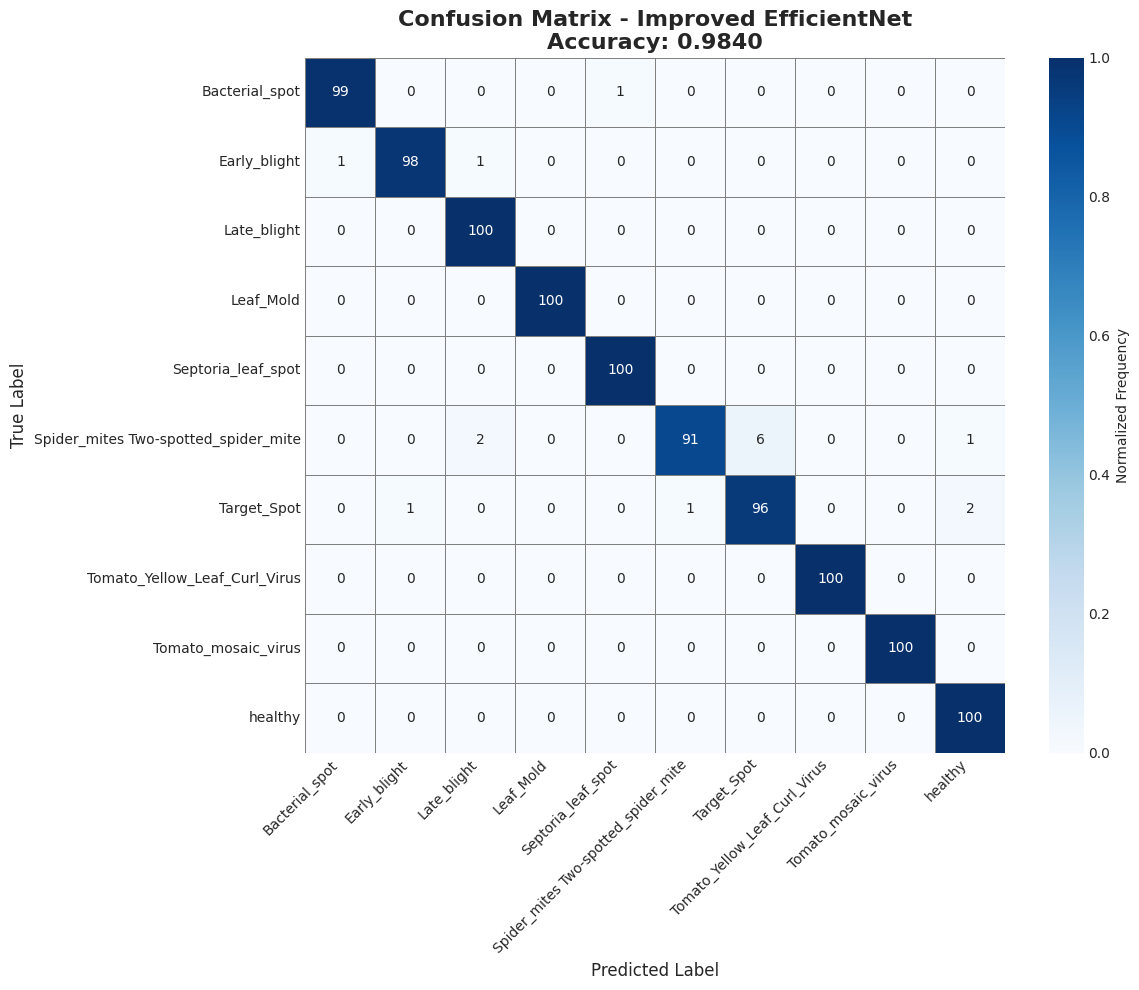


4. ROC ANALYSIS

Area Under Curve (AUC) Summary:
                               Class    AUC
                      Bacterial_spot 0.9999
                        Early_blight 0.9999
                         Late_blight 0.9999
                           Leaf_Mold 1.0000
                  Septoria_leaf_spot 1.0000
Spider_mites Two-spotted_spider_mite 0.9995
                         Target_Spot 0.9985
       Tomato_Yellow_Leaf_Curl_Virus 1.0000
                 Tomato_mosaic_virus 1.0000
                             healthy 0.9999
                       Micro-average 0.9998
                       Macro-average 0.9998


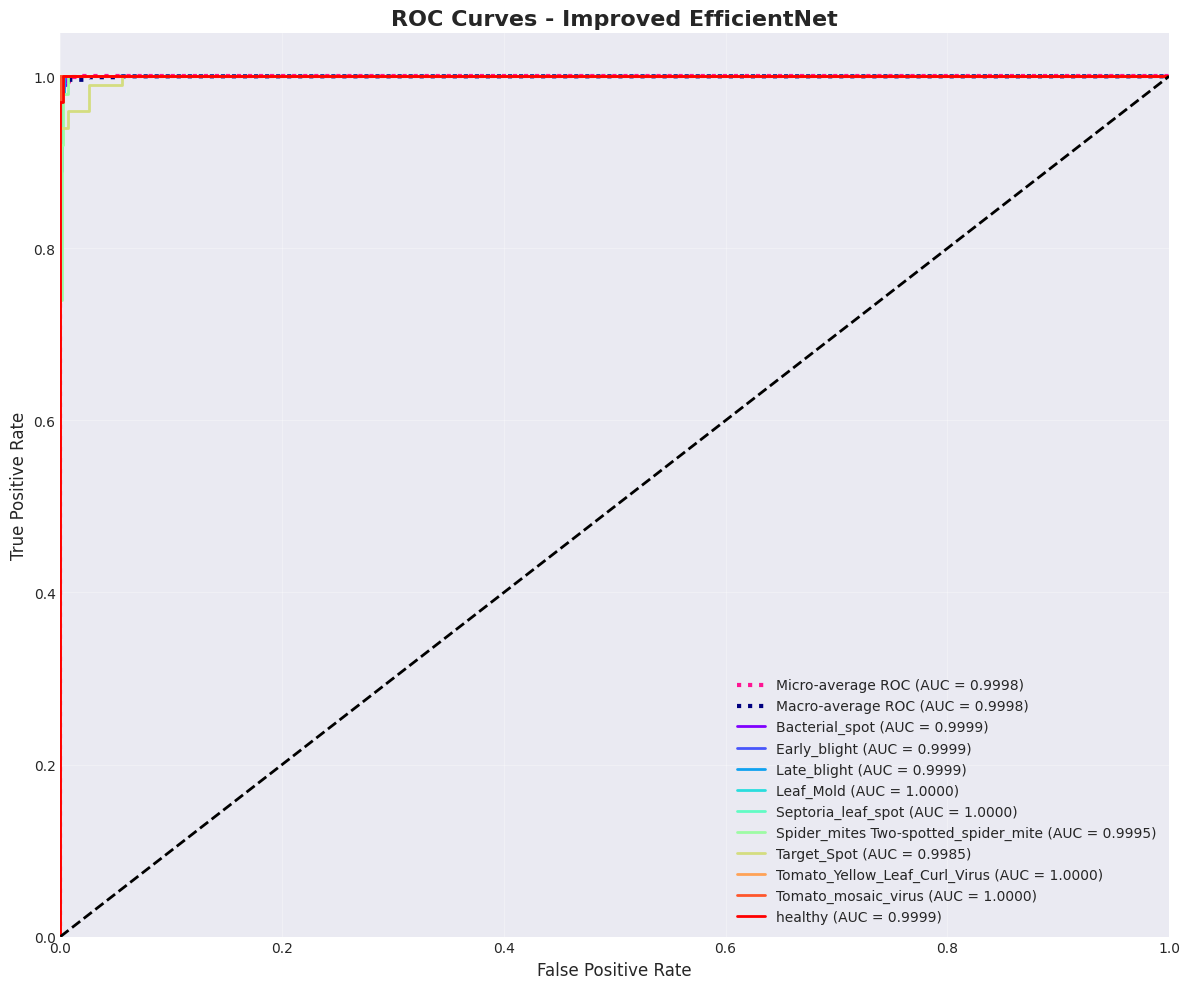


5. PRECISION-RECALL ANALYSIS

Average Precision Summary:
                               Class  Average Precision
                      Bacterial_spot             0.9995
                        Early_blight             0.9987
                         Late_blight             0.9994
                           Leaf_Mold             1.0000
                  Septoria_leaf_spot             0.9997
Spider_mites Two-spotted_spider_mite             0.9955
                         Target_Spot             0.9898
       Tomato_Yellow_Leaf_Curl_Virus             1.0000
                 Tomato_mosaic_virus             1.0000
                             healthy             0.9994
                       Micro-average             0.9987


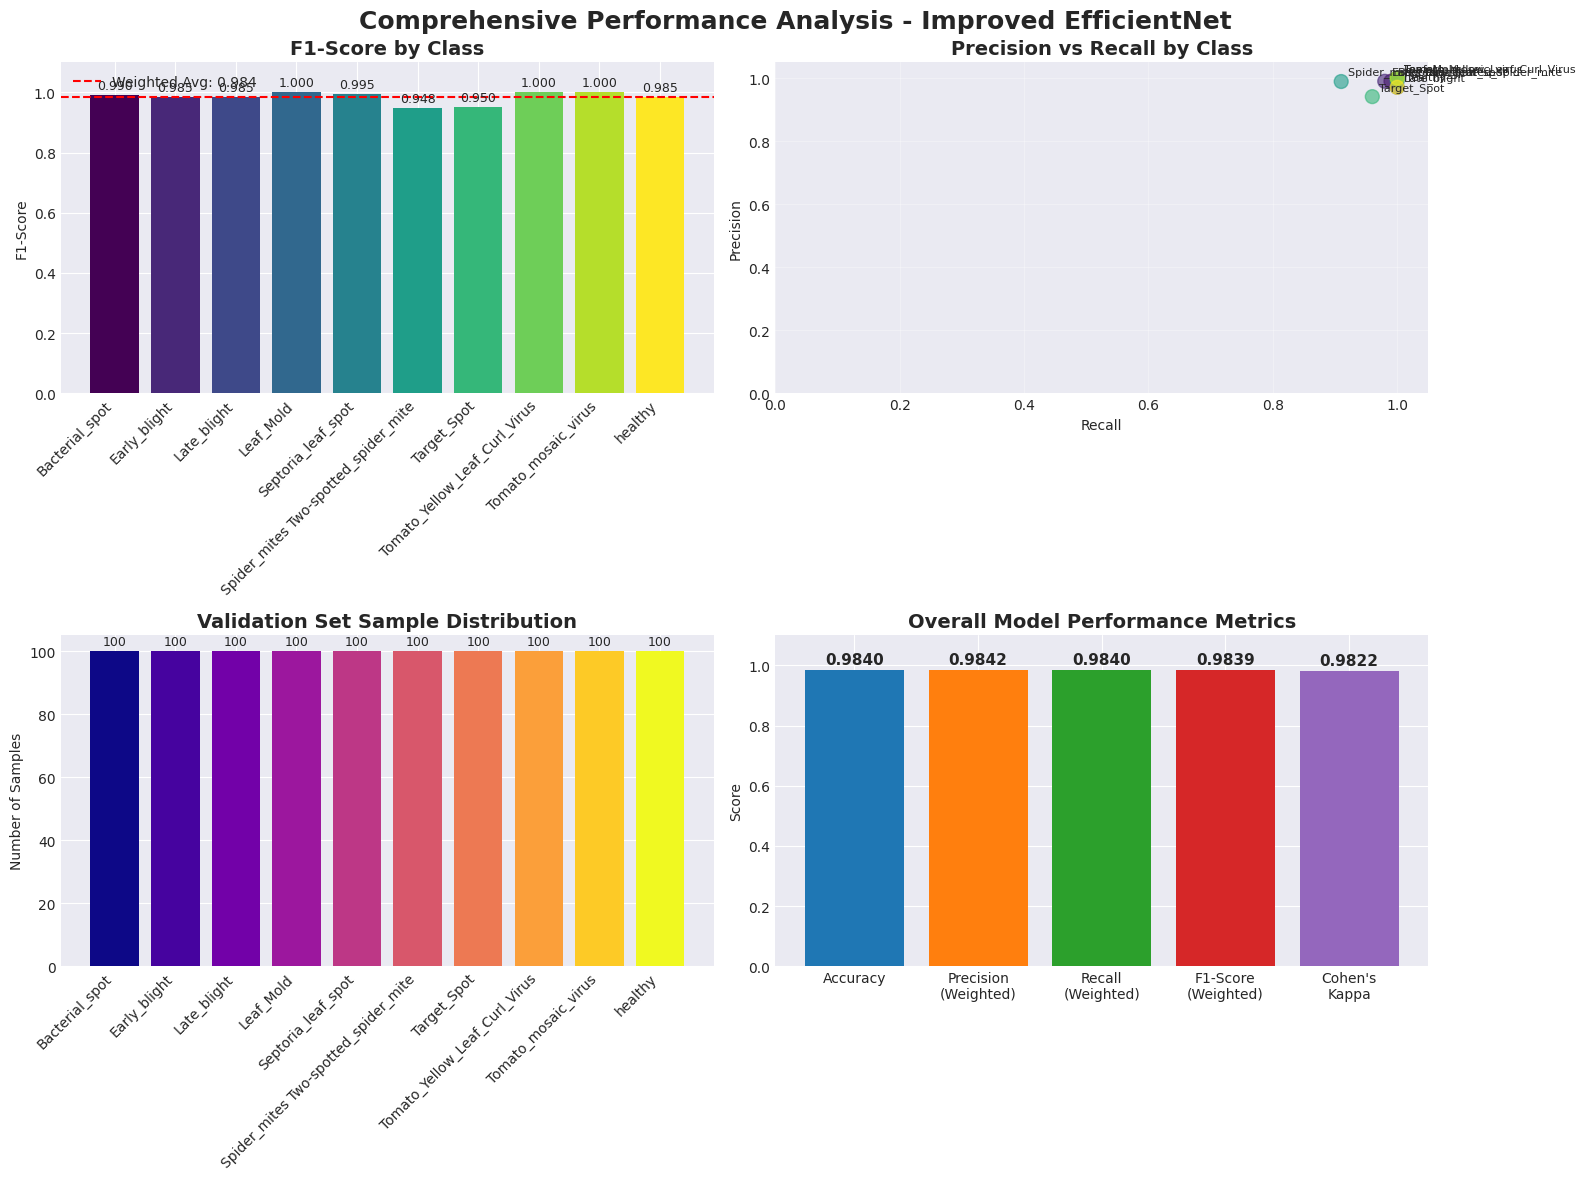


6. PUBLICATION-READY SUMMARY

Publication-Ready Summary Table:
              Performance Metric           Value
                Overall Accuracy 0.9840 (98.40%)
               Balanced Accuracy 0.9840 (98.40%)
                 Validation Loss          0.0503
       Precision (Macro Average) 0.9842 (98.42%)
          Recall (Macro Average) 0.9840 (98.40%)
        F1-Score (Macro Average) 0.9839 (98.39%)
    Precision (Weighted Average) 0.9842 (98.42%)
       Recall (Weighted Average) 0.9840 (98.40%)
     F1-Score (Weighted Average) 0.9839 (98.39%)
             Cohen's Kappa Score          0.9822
Matthews Correlation Coefficient          0.9823
               Micro-average AUC          0.9998
               Macro-average AUC          0.9998
       Average Precision (Micro)          0.9987

EVALUATION COMPLETE!

Generated Files:
1. basic_metrics_summary.csv - Core performance metrics
2. detailed_classification_report.csv - Per-class precision, recall, F1
3. per_class_confusion_metrics.cs

(                  Performance Metric            Value
 0                   Overall Accuracy  0.9840 (98.40%)
 1                  Balanced Accuracy  0.9840 (98.40%)
 2                    Validation Loss           0.0503
 3          Precision (Macro Average)  0.9842 (98.42%)
 4             Recall (Macro Average)  0.9840 (98.40%)
 5           F1-Score (Macro Average)  0.9839 (98.39%)
 6       Precision (Weighted Average)  0.9842 (98.42%)
 7          Recall (Weighted Average)  0.9840 (98.40%)
 8        F1-Score (Weighted Average)  0.9839 (98.39%)
 9                Cohen's Kappa Score           0.9822
 10  Matthews Correlation Coefficient           0.9823
 11                 Micro-average AUC           0.9998
 12                 Macro-average AUC           0.9998
 13         Average Precision (Micro)           0.9987,
                                       precision  recall  f1-score   support
 Bacterial_spot                           0.9900   0.990    0.9900   100.000
 Early_blight       

In [3]:
comprehensive_model_evaluation(model, val_generator, class_names, "Improved EfficientNet")

In [4]:
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import json
import pickle
import numpy as np
from datetime import datetime

def save_and_prepare_model_for_download(model, model_name="improved_efficientnet_tomato", 
                                       val_accuracy=0.98, history=None):
    """
    Save the model in multiple formats and prepare for download
    
    Args:
        model: Trained Keras model
        model_name: Base name for saved files
        val_accuracy: Final validation accuracy
        history: Training history object (optional)
    """
    
    print("="*70)
    print("SAVING MODEL IN MULTIPLE FORMATS")
    print("="*70)
    
    # Create a directory for all model files
    save_dir = f"{model_name}_final_model"
    os.makedirs(save_dir, exist_ok=True)
    
    # 1. Save as H5 format (Keras native format - includes everything)
    h5_path = os.path.join(save_dir, f"{model_name}_acc{val_accuracy:.3f}.h5")
    model.save(h5_path)
    print(f"✓ Saved H5 format: {h5_path}")
    
    # 2. Save as SavedModel format (TensorFlow format - better for deployment)
    savedmodel_path = os.path.join(save_dir, f"{model_name}_savedmodel")
    model.save(savedmodel_path)
    print(f"✓ Saved TensorFlow SavedModel format: {savedmodel_path}")
    
    # 3. Save model architecture as JSON
    json_path = os.path.join(save_dir, f"{model_name}_architecture.json")
    with open(json_path, 'w') as json_file:
        json_file.write(model.to_json())
    print(f"✓ Saved architecture JSON: {json_path}")
    
    # 4. Save model weights separately
    weights_path = os.path.join(save_dir, f"{model_name}_weights.h5")
    model.save_weights(weights_path)
    print(f"✓ Saved weights: {weights_path}")
    
    # 5. Save model configuration and metadata
    metadata = {
        'model_name': model_name,
        'final_validation_accuracy': float(val_accuracy),
        'total_parameters': int(model.count_params()),
        'trainable_parameters': int(sum([tf.size(w).numpy() for w in model.trainable_weights])),
        'non_trainable_parameters': int(sum([tf.size(w).numpy() for w in model.non_trainable_weights])),
        'input_shape': model.input_shape[1:],
        'output_classes': model.output_shape[-1],
        'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'tensorflow_version': tf.__version__,
        'model_summary': []
    }
    
    # Capture model summary
    summary_list = []
    model.summary(print_fn=lambda x: summary_list.append(x))
    metadata['model_summary'] = summary_list
    
    metadata_path = os.path.join(save_dir, f"{model_name}_metadata.json")
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=2)
    print(f"✓ Saved metadata: {metadata_path}")
    
    # 6. Save training history if provided
    if history:
        history_path = os.path.join(save_dir, f"{model_name}_history.pkl")
        with open(history_path, 'wb') as f:
            pickle.dump(history, f)
        print(f"✓ Saved training history: {history_path}")
        
        # Also save as CSV for easy viewing
        import pandas as pd
        history_df = pd.DataFrame(history)
        history_csv_path = os.path.join(save_dir, f"{model_name}_history.csv")
        history_df.to_csv(history_csv_path, index=False)
        print(f"✓ Saved training history CSV: {history_csv_path}")
    
    # 7. Create a comprehensive ZIP file
    zip_path = f"{model_name}_final_model_package.zip"
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory and add all files
        for root, dirs, files in os.walk(save_dir):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, os.path.dirname(save_dir))
                zipf.write(file_path, arcname)
    
    print(f"\n✓ Created comprehensive ZIP package: {zip_path}")
    
    # 8. Create model usage instructions
    instructions = f"""
# {model_name.upper()} - USAGE INSTRUCTIONS

## Model Information
- Final Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)
- Total Parameters: {metadata['total_parameters']:,}
- Input Shape: {metadata['input_shape']}
- Number of Classes: {metadata['output_classes']}
- TensorFlow Version: {metadata['tensorflow_version']}

## Loading the Model

### Method 1: Load Complete Model (Recommended)
```python
import tensorflow as tf

# Load the complete model
model = tf.keras.models.load_model('{model_name}_acc{val_accuracy:.3f}.h5')

# Make predictions
predictions = model.predict(your_preprocessed_images)
```

### Method 2: Load Architecture and Weights Separately
```python
import tensorflow as tf
import json

# Load architecture
with open('{model_name}_architecture.json', 'r') as json_file:
    model_json = json_file.read()
model = tf.keras.models.model_from_json(model_json)

# Load weights
model.load_weights('{model_name}_weights.h5')

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
```

### Method 3: Load SavedModel Format
```python
import tensorflow as tf

# Load SavedModel
model = tf.saved_model.load('{model_name}_savedmodel')
```

## Data Preprocessing
IMPORTANT: Use the same preprocessing as during training:

```python
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array
```

## Class Names
The model predicts the following classes (in order):
0: Tomato___Bacterial_spot
1: Tomato___Early_blight
2: Tomato___Late_blight
3: Tomato___Leaf_Mold
4: Tomato___Septoria_leaf_spot
5: Tomato___Spider_mites Two-spotted_spider_mite
6: Tomato___Target_Spot
7: Tomato___Tomato_Yellow_Leaf_Curl_Virus
8: Tomato___Tomato_mosaic_virus
9: Tomato___healthy

## Example Prediction
```python
# Preprocess image
img_array = preprocess_image('path/to/tomato_leaf.jpg')

# Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]

print(f"Predicted class: {{class_names[predicted_class]}}")
print(f"Confidence: {{confidence:.2%}}")
```

## Files Included:
1. {model_name}_acc{val_accuracy:.3f}.h5 - Complete model (recommended for most uses)
2. {model_name}_savedmodel/ - TensorFlow SavedModel format
3. {model_name}_architecture.json - Model architecture only
4. {model_name}_weights.h5 - Model weights only
5. {model_name}_metadata.json - Model configuration and info
6. {model_name}_history.pkl - Training history (Python pickle)
7. {model_name}_history.csv - Training history (CSV format)

## Citation
If you use this model in your research, please cite:
[Your paper citation here]

---
Model saved on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""
    
    instructions_path = os.path.join(save_dir, "README.md")
    with open(instructions_path, 'w') as f:
        f.write(instructions)
    print(f"✓ Created usage instructions: {instructions_path}")
    
    # Update the ZIP file to include instructions
    with zipfile.ZipFile(zip_path, 'a') as zipf:
        zipf.write(instructions_path, os.path.join(os.path.basename(save_dir), "README.md"))
    
    print("\n" + "="*70)
    print("MODEL SAVED SUCCESSFULLY!")
    print("="*70)
    print(f"\n📦 DOWNLOAD THIS FILE: {zip_path}")
    print(f"   Size: ~{os.path.getsize(zip_path) / (1024*1024):.1f} MB")
    print("\nThe ZIP file contains:")
    print("  • Complete trained model (H5 format)")
    print("  • TensorFlow SavedModel format")
    print("  • Model architecture (JSON)")
    print("  • Model weights (H5)")
    print("  • Training history")
    print("  • Metadata and configuration")
    print("  • Usage instructions (README)")
    
    # For Kaggle/Colab environments, create download link
    try:
        from IPython.display import FileLink, display
        display(FileLink(zip_path))
        print("\n👆 Click the link above to download the model package")
    except:
        print(f"\n💾 To download: {zip_path}")
    
    return zip_path, save_dir

# Usage example:
# Assuming your model is already loaded and history is available
# save_and_prepare_model_for_download(model, "improved_efficientnet_tomato", 0.98, history)

# If you don't have the history object, you can call it without:
# save_and_prepare_model_for_download(model, "improved_efficientnet_tomato", 0.98)

# For Google Colab users - additional download method:
def download_from_colab(file_path):
    """Download file in Google Colab"""
    try:
        from google.colab import files
        files.download(file_path)
        print(f"✓ Downloading {file_path}...")
    except:
        print("Not in Google Colab environment")

# For creating a lite version (TFLite for mobile deployment)
def create_tflite_model(model, save_dir, model_name):
    """Create TensorFlow Lite version for mobile deployment"""
    print("\nCreating TFLite version for mobile deployment...")
    
    # Convert to TFLite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    
    # Save TFLite model
    tflite_path = os.path.join(save_dir, f"{model_name}.tflite")
    with open(tflite_path, 'wb') as f:
        f.write(tflite_model)
    
    print(f"✓ Saved TFLite model: {tflite_path}")
    print(f"  Size: {os.path.getsize(tflite_path) / (1024*1024):.1f} MB")
    
    return tflite_path

In [5]:
# Save your 98% accuracy model
save_and_prepare_model_for_download(
    model=model,
    model_name="improved_efficientnet_tomato",
    val_accuracy=0.98,
    history=history  # Optional: include if you have the training history
)


SAVING MODEL IN MULTIPLE FORMATS
✓ Saved H5 format: improved_efficientnet_tomato_final_model/improved_efficientnet_tomato_acc0.980.h5
✓ Saved TensorFlow SavedModel format: improved_efficientnet_tomato_final_model/improved_efficientnet_tomato_savedmodel
✓ Saved architecture JSON: improved_efficientnet_tomato_final_model/improved_efficientnet_tomato_architecture.json
✓ Saved weights: improved_efficientnet_tomato_final_model/improved_efficientnet_tomato_weights.h5
✓ Saved metadata: improved_efficientnet_tomato_final_model/improved_efficientnet_tomato_metadata.json
✓ Saved training history: improved_efficientnet_tomato_final_model/improved_efficientnet_tomato_history.pkl
✓ Saved training history CSV: improved_efficientnet_tomato_final_model/improved_efficientnet_tomato_history.csv

✓ Created comprehensive ZIP package: improved_efficientnet_tomato_final_model_package.zip
✓ Created usage instructions: improved_efficientnet_tomato_final_model/README.md

MODEL SAVED SUCCESSFULLY!

📦 DOWNLOAD T

/kaggle/working/improved_efficientnet_tomato_final_model_package.zip


👆 Click the link above to download the model package


('improved_efficientnet_tomato_final_model_package.zip',
 'improved_efficientnet_tomato_final_model')

In [6]:
# Simple and direct way to save your model

import tensorflow as tf
import os
from datetime import datetime

# Method 1: Quick save (simplest)
def quick_save_model(model, accuracy=0.98):
    """Simple save function"""
    
    # Create filename with accuracy
    filename = f"tomato_disease_efficientnet_acc{accuracy:.3f}.h5"
    
    # Save the model
    model.save(filename)
    print(f"✅ Model saved as: {filename}")
    print(f"📦 File size: {os.path.getsize(filename) / (1024*1024):.1f} MB")
    
    # For Kaggle - display download link
    try:
        from IPython.display import FileLink, display
        display(FileLink(filename))
        print("\n👆 Click the link above to download your model!")
    except:
        pass
    
    return filename

# Method 2: Save with additional formats
def save_model_multiple_formats(model, base_name="tomato_efficientnet"):
    """Save in multiple formats"""
    
    print("Saving model in multiple formats...")
    
    # 1. Keras H5 format
    h5_file = f"{base_name}.h5"
    model.save(h5_file)
    print(f"✅ Saved as H5: {h5_file}")
    
    # 2. SavedModel format
    savedmodel_dir = f"{base_name}_savedmodel"
    model.save(savedmodel_dir)
    print(f"✅ Saved as SavedModel: {savedmodel_dir}/")
    
    # 3. Weights only
    weights_file = f"{base_name}_weights.h5"
    model.save_weights(weights_file)
    print(f"✅ Saved weights: {weights_file}")
    
    # Create a simple zip file
    import zipfile
    zip_name = f"{base_name}_all_formats.zip"
    with zipfile.ZipFile(zip_name, 'w') as zipf:
        zipf.write(h5_file)
        zipf.write(weights_file)
        # Add savedmodel files
        for root, dirs, files in os.walk(savedmodel_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path)
    
    print(f"\n📦 Created ZIP file: {zip_name}")
    print(f"📦 ZIP size: {os.path.getsize(zip_name) / (1024*1024):.1f} MB")
    
    # Display download link for Kaggle
    try:
        from IPython.display import FileLink, display
        display(FileLink(zip_name))
        print("\n👆 Click to download the ZIP file with all formats!")
    except:
        pass
    
    return zip_name

# Method 3: For Google Colab users
def save_and_download_colab(model, filename="tomato_model.h5"):
    """Save and auto-download in Google Colab"""
    
    # Save model
    model.save(filename)
    print(f"✅ Model saved as: {filename}")
    
    # Try to auto-download in Colab
    try:
        from google.colab import files
        files.download(filename)
        print("📥 Downloading file...")
    except:
        print("💾 Not in Colab - file saved locally")
    
    return filename

# USAGE EXAMPLES:

# Option 1 - Simplest (recommended):
# quick_save_model(model, accuracy=0.98)

# Option 2 - Multiple formats:
# save_model_multiple_formats(model, "tomato_efficientnet_98acc")

# Option 3 - For Google Colab:
# save_and_download_colab(model, "tomato_efficientnet_model.h5")

# If you need to load the model later:
"""
# Loading the saved model:
loaded_model = tf.keras.models.load_model('tomato_disease_efficientnet_acc0.980.h5')

# Test the loaded model:
test_predictions = loaded_model.predict(val_generator)
print(f"Model loaded successfully! Output shape: {test_predictions.shape}")
"""

print("\n🎯 Choose one of the methods above to save your model!")
print("For Kaggle, Option 1 (quick_save_model) is recommended.")


🎯 Choose one of the methods above to save your model!
For Kaggle, Option 1 (quick_save_model) is recommended.


In [7]:
save_model_multiple_formats(model, "tomato_efficientnet_98acc_all_formats.zip")


Saving model in multiple formats...
✅ Saved as H5: tomato_efficientnet_98acc_all_formats.zip.h5
✅ Saved as SavedModel: tomato_efficientnet_98acc_all_formats.zip_savedmodel/
✅ Saved weights: tomato_efficientnet_98acc_all_formats.zip_weights.h5

📦 Created ZIP file: tomato_efficientnet_98acc_all_formats.zip_all_formats.zip
📦 ZIP size: 79.2 MB


/kaggle/working/tomato_efficientnet_98acc_all_formats.zip_all_formats.zip


👆 Click to download the ZIP file with all formats!


'tomato_efficientnet_98acc_all_formats.zip_all_formats.zip'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

# Load the trained model (assuming it's saved as 'best_model_fixed.h5')
model = tf.keras.models.load_model('best_model_fixed.h5')

# Define class names (based on the training data)
class_names = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight', 
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

def predict_leaf_disease(img_path):
    """
    Predict tomato leaf disease from an image.
    
    Args:
        img_path (str): Path to the input image file
        
    Returns:
        tuple: (predicted_class_name, confidence_score)
    """
    try:
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # EfficientNet preprocessing
        
        # Make prediction
        predictions = model.predict(img_array, verbose=0)
        
        # Get the predicted class and confidence
        predicted_class_idx = np.argmax(predictions[0])
        predicted_class = class_names[predicted_class_idx]
        confidence = predictions[0][predicted_class_idx]
        
        return predicted_class, confidence
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None

# Example usage:
# Replace 'path/to/your/image.jpg' with the actual path to your test image
#predicted_disease, confidence = predict_leaf_disease('d:\project_2026\CTS\PROJECTS\Leaf_disease_detection/tomato/val/Tomato___Bacterial_spot/0ab9c705-f29e-45ac-b786-9549b3c38f16___GCREC_Bact.Sp 3223.JPG')
#predicted_disease, confidence = predict_leaf_disease('d:\project_2026\CTS\PROJECTS\Leaf_disease_detection/tomato/val/Tomato___Early_blight/00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG')
#predicted_disease, confidence = predict_leaf_disease('d:\project_2026\CTS\PROJECTS\Leaf_disease_detection/tomato/val/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG')
#predicted_disease, confidence = predict_leaf_disease('d:\project_2026\CTS\PROJECTS\Leaf_disease_detection/tomato/val/Tomato___Late_blight/00ce4c63-9913-4b16-898c-29f99acf0dc3___RS_Late.B 4982.JPG')
#predicted_disease, confidence = predict_leaf_disease('d:\project_2026\CTS\PROJECTS\Leaf_disease_detection/tomato/val/Tomato___Leaf_Mold/0a9b3ff4-5343-4814-ac2c-fdb3613d4e4d___Crnl_L.Mold 6559.JPG')
predicted_disease, confidence = predict_leaf_disease('d:\project_2026\CTS\PROJECTS\Leaf_disease_detection/tomato/val/Tomato___Septoria_leaf_spot/00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG')
print(f"Predicted Disease: {predicted_disease}")
print(f"Confidence: {confidence:.2%}")

# Interactive example - you can modify this to test with your images
#print("Inference function loaded!")
#print("Use predict_leaf_disease('path/to/image.jpg') to make predictions")
#print("Available classes:", class_names)

Predicted Disease: Tomato___Septoria_leaf_spot
Confidence: 100.00%
Inference function loaded!
Use predict_leaf_disease('path/to/image.jpg') to make predictions
Available classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
